In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
import os
os.getcwd()


'c:\\Users\\kunan\\Downloads\\Ecom - Cart Recomendations\\notebooks'

In [9]:
os.listdir('..')


['.gitignore', 'data', 'notebooks', 'requirements.txt', 'src']

In [15]:
df=pd.read_csv('..\data\events.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


In [19]:
for i in df.columns:
    print(i,df[i].nunique())

timestamp 2750455
visitorid 1407580
event 3
itemid 235061
transactionid 17672


In [ ]:
df.apply(lambda col: col.duplicated().sum())


timestamp           5646
visitorid        1348521
event            2756098
itemid           2521040
transactionid    2738428
dtype: int64

In [25]:
df

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN
2756097,1438399813142,762376,view,115946,NaN
2756098,1438397820527,1251746,view,78144,NaN
2756099,1438398530703,1184451,view,283392,NaN


In [27]:
df['timestamp']=pd.to_datetime(df['timestamp'],unit='ms')

In [28]:
df['timestamp']

0         2015-06-02 05:02:12.117
1         2015-06-02 05:50:14.164
2         2015-06-02 05:13:19.827
3         2015-06-02 05:12:35.914
4         2015-06-02 05:02:17.106
                    ...          
2756096   2015-08-01 03:13:05.939
2756097   2015-08-01 03:30:13.142
2756098   2015-08-01 02:57:00.527
2756099   2015-08-01 03:08:50.703
2756100   2015-08-01 03:36:03.914
Name: timestamp, Length: 2756101, dtype: datetime64[ns]

In [30]:
df['year']=df['timestamp'].dt.year
df["hour"] = df["timestamp"].dt.hour
df["dayofweek"] = df["timestamp"].dt.dayofweek


In [38]:
df["label"] = (df["event"] == "transaction").astype(int)

In [39]:
df["label"] .value_counts()

label
0    2733644
1      22457
Name: count, dtype: int64

In [31]:
df

,timestamp,visitorid,event,itemid,transactionid,year,hour,dayofweek
0,2015-06-02 05:02:12.117,257597,view,355908,NaN,2015,5,1
1,2015-06-02 05:50:14.164,992329,view,248676,NaN,2015,5,1
2,2015-06-02 05:13:19.827,111016,view,318965,NaN,2015,5,1
3,2015-06-02 05:12:35.914,483717,view,253185,NaN,2015,5,1
4,2015-06-02 05:02:17.106,951259,view,367447,NaN,2015,5,1
...,...,...,...,...,...,...,...,...
2756096,2015-08-01 03:13:05.939,591435,view,261427,NaN,2015,3,5
2756097,2015-08-01 03:30:13.142,762376,view,115946,NaN,2015,3,5
2756098,2015-08-01 02:57:00.527,1251746,view,78144,NaN,2015,2,5
2756099,2015-08-01 03:08:50.703,1184451,view,283392,NaN,2015,3,5


<Axes: xlabel='dayofweek', ylabel='count'>

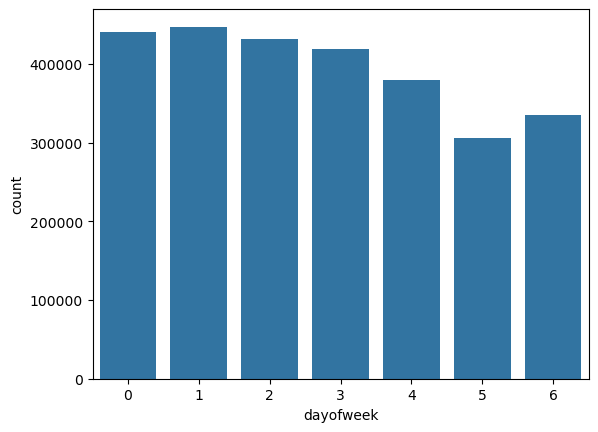

In [34]:
sns.countplot(data=df,x='dayofweek')

More traffic is on weekday compared to weekend

<Axes: xlabel='hour', ylabel='count'>

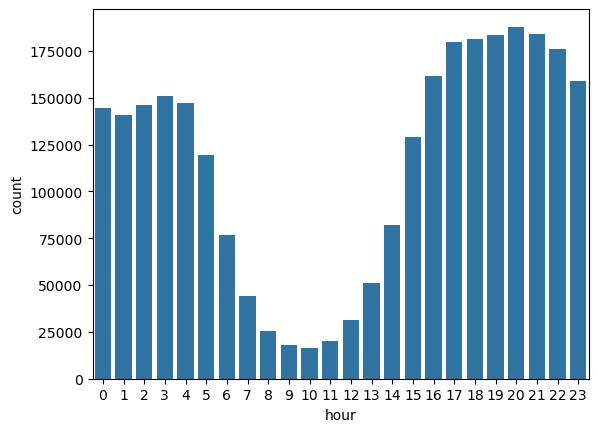

In [35]:
sns.countplot(data=df,x='hour')

Most traffic comes in evening to midnight

In [37]:
df['event'].value_counts()

event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64

Data is Imbalanced

<Axes: xlabel='year', ylabel='count'>

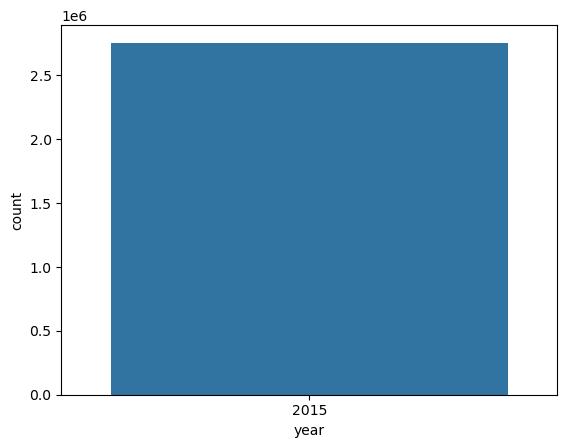

In [36]:
sns.countplot(data=df,x='year')

Data belongs to year 2015 only

In [24]:
df.isna().sum()

timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64